In [1]:
import pandas as pd
train = pd.read_csv('train.csv')

In [2]:
#评分函数
import scipy as sp
def logloss(act, pred):
  epsilon = 1e-15
  pred = sp.maximum(epsilon, pred)
  pred = sp.minimum(1-epsilon, pred)
  ll = -sp.mean(act*sp.log(pred) + sp.subtract(1,act)*sp.log(1-pred))
  return ll

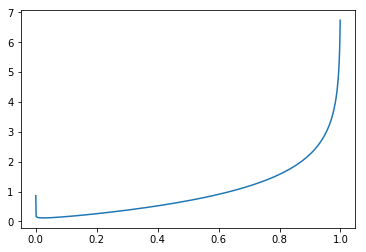

In [3]:
#考察0~1之间分最高的
import numpy as np
result = []
for i in range(0,1000):
    i = i*0.001
    pred = [i]*train.shape[0]
    result.append([i,logloss(train['label'],pred)])
result = np.array(result)

#用matplotlib画图
from matplotlib import pyplot as plt
plt.plot(result[:,0],result[:,1])
plt.show()

In [4]:
sorted(result,key=lambda x:x[1])[:10]

[array([ 0.025     ,  0.11644157]),
 array([ 0.024     ,  0.11645731]),
 array([ 0.026     ,  0.11646667]),
 array([ 0.023     ,  0.11651731]),
 array([ 0.027     ,  0.11652963]),
 array([ 0.022     ,  0.11662538]),
 array([ 0.028     ,  0.11662776]),
 array([ 0.029     ,  0.11675867]),
 array([ 0.021     ,  0.11678592]),
 array([ 0.03     ,  0.1169202])]

可见最好的是0.025 分数为0.11644157

In [5]:
#输出
test = pd.read_csv('test.csv')
test['prob'] = 0.025
test = test[['instanceID','prob']]
test.to_csv('submission.csv',index=None)